In [ ]:
import pandas as pd


,time,acc_x,acc_y,acc_z
0,2024-07-19 20:00:05.059999943,-36,284,-232
1,2024-07-19 20:00:05.079999924,-224,-92,-60
2,2024-07-19 20:00:05.099999905,-236,-96,-64
3,2024-07-19 20:00:05.119999886,-240,-96,-72
4,2024-07-19 20:00:05.140000105,-252,-108,-80


In [12]:
data_right = pd.read_csv('right_accs.csv', header=None)
data_right.columns = ['time', 'acc_x', 'acc_y', 'acc_z']
data_right.head()
data_right['time'] = pd.to_datetime(data_right['time'], unit='s')

In [ ]:
data_left = pd.read_csv('left_accs.csv', header=None)
data_left.columns = ['time', 'acc_x', 'acc_y', 'acc_z']
data_left['time'] = pd.to_datetime(data_left['time'], unit='s')
data_left.head()

In [2]:
pip install claspy

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 15.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   -- ------------------------------------- 2.1/28.1 MB 19.5 MB/s eta 0:00:02
   --- ------------------------------------ 2.4/28.1 MB 5.4 MB/s eta 0:00:05
   ------ --------------------------------- 4.7/28.1 MB 7.7 MB/s eta 0:00:04
   ----------- ---------------------------- 8.1/28.1 MB 10.9 MB/s eta 0:00:02
   ----------- ---------------------------- 8.1/28.1 MB 10.9 MB/s eta 0:00:02
   ----------- ---------------------------- 8.1/28.1 MB 10.9 MB/s eta 0:00:02
   ------------ --------------------------- 8.9/28.1 MB 6.2 MB/s eta 0:00:04
   ----------------- ---------------------- 12.1/28.1 MB 7.3 MB/s eta 0:00:03
   ---------------------- ----------------- 15.7/28.1 MB 8.5 MB/s eta 0:00:02
   ------------------------ --------------- 17.6/28.1 MB 9.0 MB/s eta 0:00:02
   ----

In [16]:
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_tssb_dataset
from claspy.data_loader import load_has_dataset

In [28]:
import numpy as np

In [ ]:
dataset, window_size, true_cps, labels, time_series = load_has_dataset().iloc[107, :]

AttributeError: 'str' object has no attribute 'head'

In [57]:
labels

array(['walk', 'wait', 'get on', 'ride train (standing)', 'get off'],
      dtype='<U21')

In [58]:
n = 1000000
data_right_sample = data_right.iloc[0:n,1:4]
data_left_sample = data_left.iloc[0:n, 1:4]
data_merged = pd.concat([data_right_sample, data_left_sample], axis=1)
data_merged


,acc_x,acc_y,acc_z,acc_x,acc_y,acc_z
0,112,232,-96,-36,284,-232
1,-240,20,56,-224,-92,-60
2,-248,20,60,-236,-96,-64
3,-248,20,56,-240,-96,-72
4,-252,20,60,-252,-108,-80
...,...,...,...,...,...,...
999995,-104,24,224,248,-8,20
999996,-104,24,228,248,-8,20
999997,-104,24,228,248,-8,24
999998,-104,28,224,248,-8,24


In [ ]:
#dataset, window_size, true_cps, labels, time_series = load_has_dataset().iloc[107, :]
time_series = np.array(data_merged)
clasp = BinaryClaSPSegmentation()
clasp.fit_predict(time_series)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: xlabel='split point', ylabel='ClaSP Score'>], dtype=object)

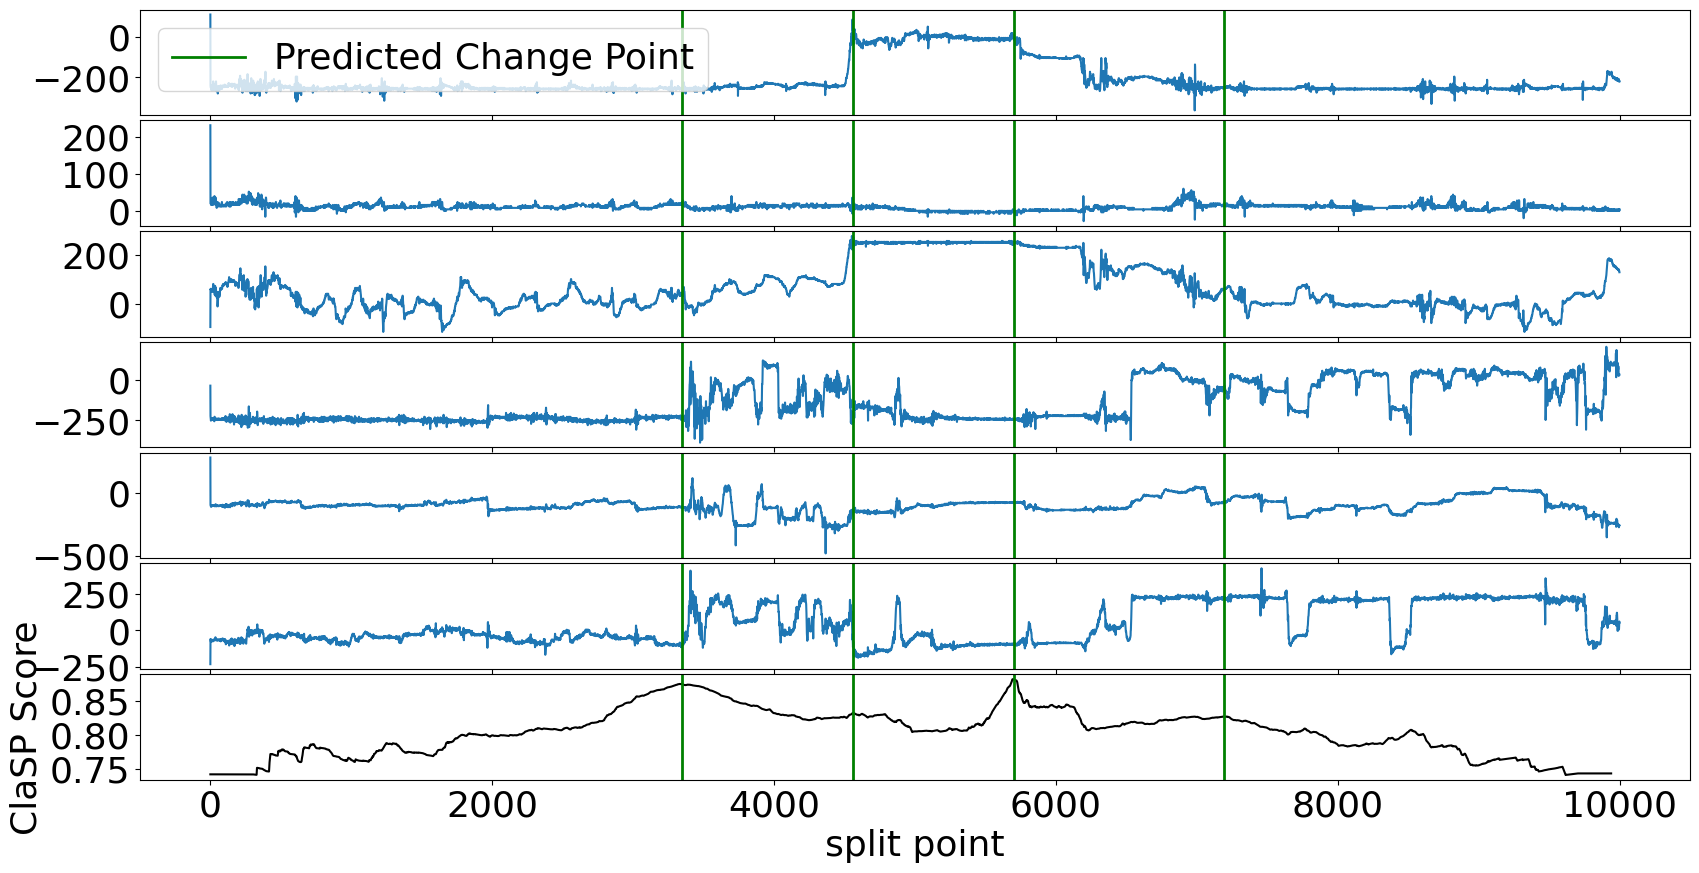

In [52]:
clasp.plot()